<a href="https://colab.research.google.com/github/chinnuzz77/Chocolate-Bar-Rating-Analysis/blob/main/chocolate_bar_rating_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chocolate Bar Ratings Analysis


Chocolate is one of the most popular candies in the world. Most importanly not all chocolates are created equally,For this reason its meaningful to analayze chocolate bar ratings . This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.
#Flavors of Cacao Rating System:


*  5= Elite (Transcending beyond the ordinary limits) List item
*  4= Premium (Superior flavor development, character and style) 

*   3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)

* 2= Disappointing (Passable but contains at least one significant flaw)

* 1= Unpleasant (mostly unpalatable)










In [4]:
#import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Questions for Analysis 


* Where are the best beans grown?
*  which country produced the highest rated bars?
* What is the relation between cocoa percentage and rating ?   
*  which company has highest rating ?
* which type of bean is used in highest rated bars ?   
*  Broad bean origin of highest rated bars? 
* which company produce max no. of chocolate bars ?  
* where soma gets its beans ?   
* what are the ratings for soma's chocolate bars ?
* find the ratings of chocolate bars with 70% cocoa ?  
* which is the top company gets rating >= 3.5 












In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data analysis projects/flavors_of_cacao.csv')
df                                                                                         # reading the csv_ file

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [6]:
df.shape    # shape of the data

(1795, 9)

In [7]:
df.columns     # finding the columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [8]:
df.describe()   

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [9]:
df.describe(include='object')

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,Cocoa\nPercent,Company\nLocation,Bean\nType,Broad Bean\nOrigin
count,1795,1795,1795,1795,1794,1794
unique,416,1039,45,60,41,100
top,Soma,Madagascar,70%,U.S.A.,,Venezuela
freq,47,57,672,764,887,214


In [10]:
df.isnull()      # checking the null values in data set

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1790,False,False,False,False,False,False,False,False,False
1791,False,False,False,False,False,False,False,False,False
1792,False,False,False,False,False,False,False,False,False
1793,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()   

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

# Cleaning the data set

In [12]:
df.columns = ['CompanyName','BeanOrigin','REF','ReviewDate','CocoaPercent','Location','Rating','BeanType','BroadOrgin']
df                                                                                                                         # change the column names



,CompanyName,BeanOrigin,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrgin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [13]:
df.CompanyName.value_counts()

Soma               47
Bonnat             27
Fresco             26
Pralus             25
A. Morin           23
                   ..
Chocablog           1
ChocoReko           1
Durand              1
Mayacama            1
Cacao de Origin     1
Name: CompanyName, Length: 416, dtype: int64

In [14]:
df.	CocoaPercent.value_counts()

70%      672
75%      222
72%      189
65%       78
80%       72
74%       50
68%       47
60%       43
73%       40
85%       36
64%       34
77%       33
71%       31
67%       27
76%       23
66%       23
100%      20
78%       17
82%       17
55%       16
62%       14
63%       12
69%       10
88%        8
58%        8
61%        8
90%        8
81%        5
72.5%      4
83%        4
84%        4
91%        3
89%        2
73.5%      2
99%        2
56%        2
50%        1
46%        1
57%        1
79%        1
87%        1
53%        1
86%        1
60.5%      1
42%        1
Name: CocoaPercent, dtype: int64

In [15]:
df.BroadOrgin.value_counts()

Venezuela                      214
Ecuador                        193
Peru                           165
Madagascar                     145
Dominican Republic             141
                              ... 
Gre., PNG, Haw., Haiti, Mad      1
Dominican Rep., Bali             1
Suriname                         1
Madagascar & Ecuador             1
Trinidad-Tobago                  1
Name: BroadOrgin, Length: 100, dtype: int64

In [16]:
df.BeanType.value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Beniano                       3
EET                           3
Matina                        3
Nacional (Arriba)             3
Trinitario (85% Criollo)      2
Criollo, Forastero            2
Criollo (Ocumare 61)          2
Forastero (Catongo)           2
Criollo (Amarru)              2
Trinitario, Forastero         2
Amazon mix                    2
Nacional                      2
Amazon, ICS                   2
Forastero(Arriba, CCN)        1
CCN51                         1
Criollo (Ocumare 77)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Criollo (Wild)                1
Trinitar

In [17]:
 df['BeanType'] = df['BeanType'].fillna('unknown')
 df.BeanType.value_counts()         # filling the null values with unknown
 
 

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Matina                        3
Beniano                       3
Nacional (Arriba)             3
Criollo (Ocumare 61)          2
Nacional                      2
Criollo, Forastero            2
Forastero (Catongo)           2
Criollo (Amarru)              2
Amazon, ICS                   2
Amazon mix                    2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Blend-Forastero,Criollo       1
CCN51                         1
Criollo, +                    1
Criollo (Ocumare 67)          1
unknown                       1
Trinitario (Amelonado)        1
Criollo 

In [18]:
df.drop(['REF'], axis=1, inplace=True)
df
                                       # column REF is same as the reviewdate or its an alternative value so we drop the column

,CompanyName,BeanOrigin,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrgin
0,A. Morin,Agua Grande,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,2011,62%,Austria,3.25,,India


In [19]:
list(df['BeanType'][0:5])    # checking the value of blank space in the column BeanType

['\xa0', '\xa0', '\xa0', '\xa0', '\xa0']

In [20]:
def space(x):
    if(x is "\xa0"):
        return "None"
    
    
df['BeanType'] = df['BeanType'].apply(space)          # fill that space with None
df.head()
df.head()

,CompanyName,BeanOrigin,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrgin
0,A. Morin,Agua Grande,2016,63%,France,3.75,None,Sao Tome
1,A. Morin,Kpime,2015,70%,France,2.75,None,Togo
2,A. Morin,Atsane,2015,70%,France,3.00,None,Togo
3,A. Morin,Akata,2015,70%,France,3.50,None,Togo
4,A. Morin,Quilla,2015,70%,France,3.50,None,Peru


In [21]:

df['CocoaPercent'] = df['CocoaPercent'].str.replace("%",'').astype(float)/100
df.head(5)       # change the values of cocoapercent into float

,CompanyName,BeanOrigin,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrgin
0,A. Morin,Agua Grande,2016,0.63,France,3.75,None,Sao Tome
1,A. Morin,Kpime,2015,0.70,France,2.75,None,Togo
2,A. Morin,Atsane,2015,0.70,France,3.00,None,Togo
3,A. Morin,Akata,2015,0.70,France,3.50,None,Togo
4,A. Morin,Quilla,2015,0.70,France,3.50,None,Peru


# Exploring the data

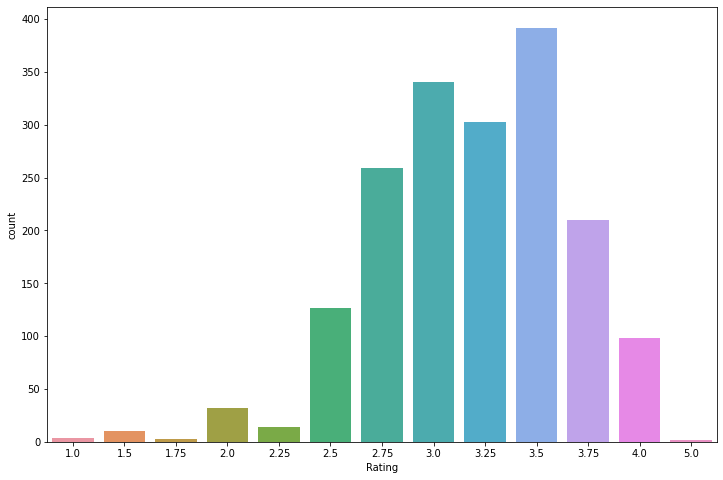

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='Rating',data=df)
plt.show()      # most of the bars have been rated  as 3.5

In [23]:
df[df['Rating'] == 3.5][['CompanyName','BeanType']].describe(include='all')

,CompanyName,BeanType
count,392,169
unique,187,1
top,Soma,None
freq,13,169


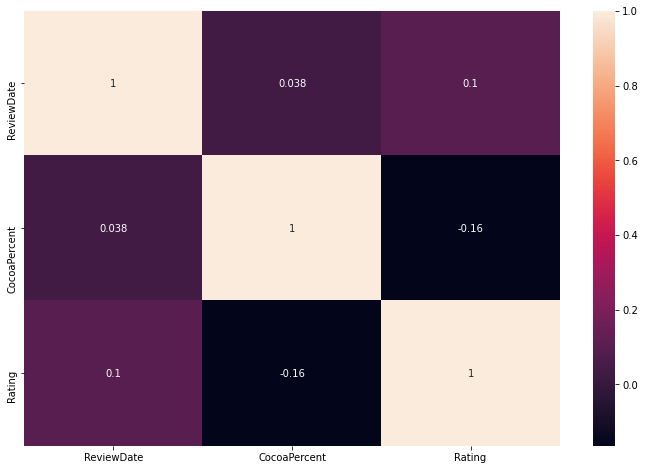

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)      # there is very less correlation between variables
plt.show()

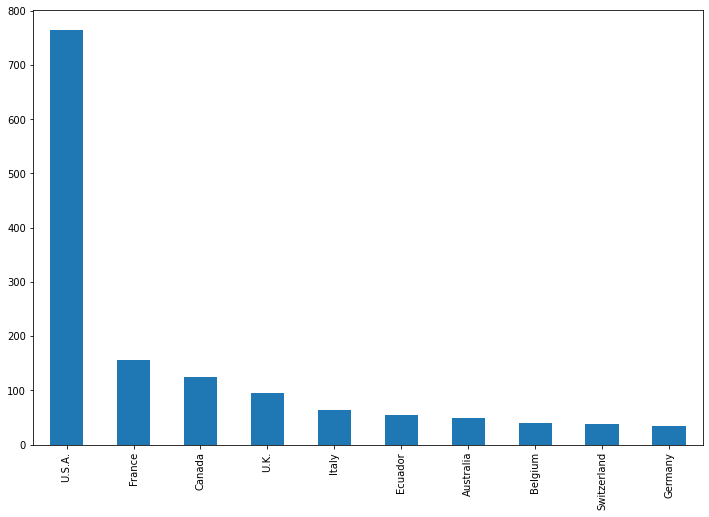

In [25]:
plt.figure(figsize=(12,8))
df['Location'].value_counts().head(10).plot.bar()   # most of the bars from U.S.A
plt.show() 

In [26]:
df.groupby('ReviewDate')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
ReviewDate,,,,,,,,
2006,72.0,3.125000,0.769122,1.00,2.9375,3.00,3.5625,5.00
2007,77.0,3.162338,0.699819,1.00,3.0000,3.00,3.5000,5.00
2008,93.0,2.994624,0.544212,1.00,2.7500,3.00,3.5000,4.00
2009,123.0,3.073171,0.459119,1.50,2.7500,3.00,3.5000,4.00
2010,111.0,3.148649,0.466343,1.50,2.7500,3.25,3.5000,4.00
2011,165.0,3.256061,0.489954,1.50,3.0000,3.25,3.5000,4.00
2012,195.0,3.178205,0.483596,1.50,2.7500,3.25,3.5000,4.00
2013,184.0,3.197011,0.446118,1.75,2.7500,3.25,3.5000,4.00
2014,247.0,3.189271,0.414861,2.00,2.8750,3.25,3.5000,4.00


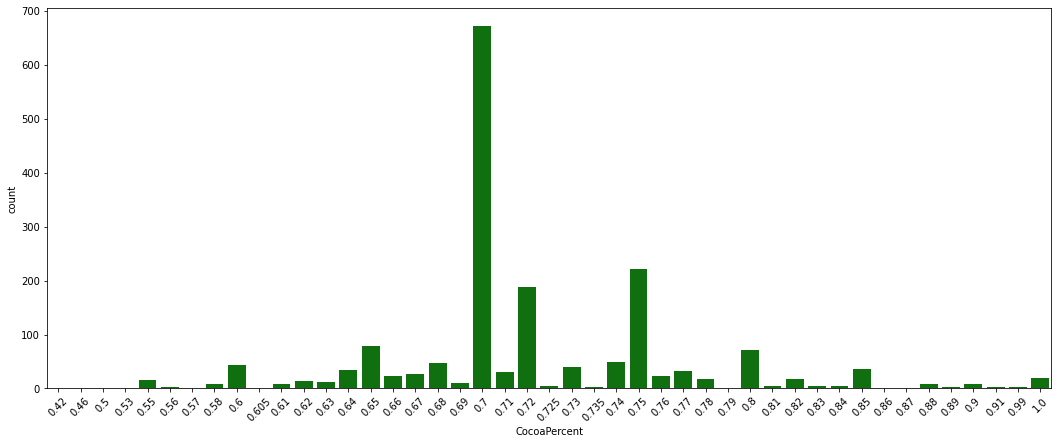

In [27]:
plt.figure(figsize=(18,7))
sns.countplot(x= 'CocoaPercent', data = df, color = 'green')      # mean cocoa percentage is 70%  
plt.xticks(rotation=45)
plt.show()

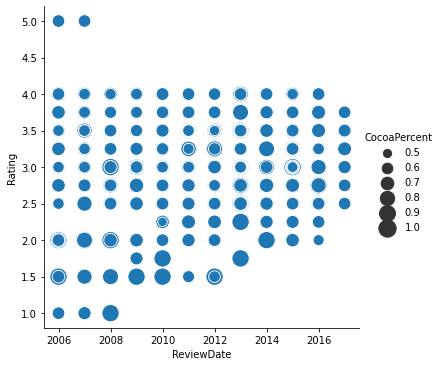

In [28]:

sns.relplot(x="ReviewDate",y="Rating",size="CocoaPercent",sizes=(30,300),data=df)
plt.show()                                   # this graph shows the relation between rating,cocoapercent and review date

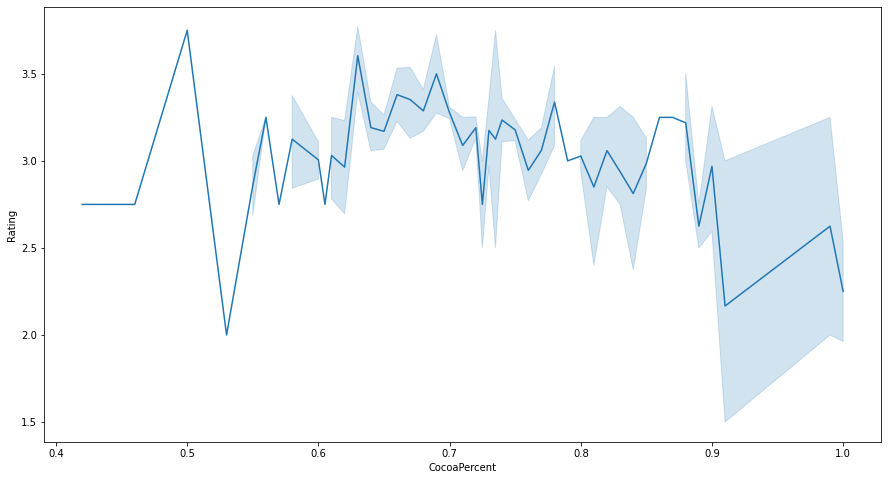

In [29]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CocoaPercent",y="Rating",data=df)   # the sweet spot is around 70%,and a rating 3 - 3.5
plt.show()

In [30]:
d2 = df[df['CocoaPercent'] == .70]
d2.count()    #count of chocolate bars with 70% cocoa

CompanyName     672
BeanOrigin      672
ReviewDate      672
CocoaPercent    672
Location        672
Rating          672
BeanType        357
BroadOrgin      672
dtype: int64

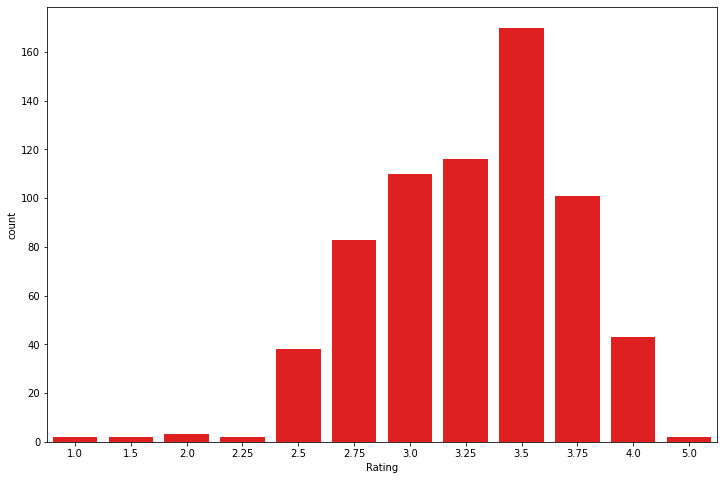

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x="Rating",data=d2,color="red")
plt.show()       # bars with 70% of cocoa and its ratings

In [32]:
d3 = df[df['Rating'] >= 3.5]           #  count of bars rating is >= 3.5
d3.count()

CompanyName     702
BeanOrigin      702
ReviewDate      702
CocoaPercent    702
Location        702
Rating          702
BeanType        302
BroadOrgin      702
dtype: int64

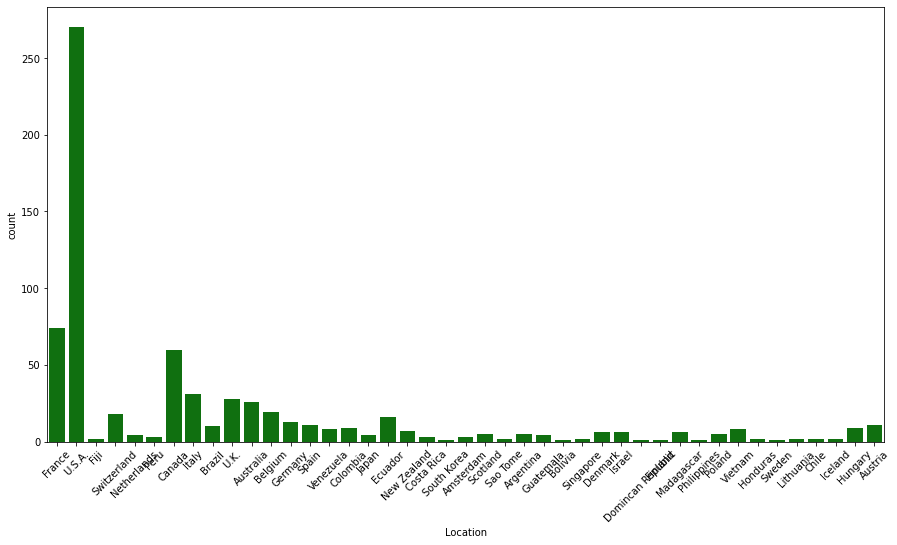

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(x="Location",data=d3,color="green")       # bars from USA have rating >= 3.5
plt.xticks(rotation=45)
plt.show()

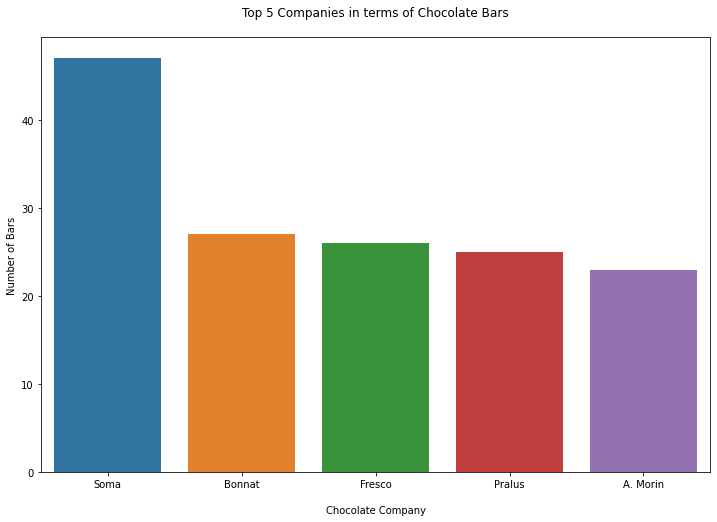

In [34]:
d4 = df['CompanyName'].value_counts().sort_values(ascending=False).head(5)
d4 = pd.DataFrame(d4)
d4 = d4.reset_index() 

plt.figure(figsize=(12,8))
sns.barplot(x='index', y='CompanyName', data=d4)
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")                         # find the top five companiies
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()


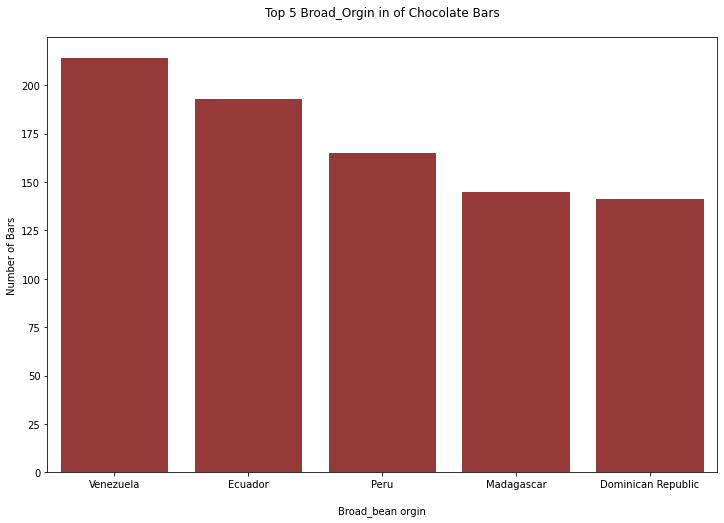

In [35]:
d5 = df['BroadOrgin'].value_counts().sort_values(ascending=False).head(5)
d5 = pd.DataFrame(d5)
d5 = d5.reset_index() 

plt.figure(figsize=(12,8))
sns.barplot(x='index', y='BroadOrgin', data=d5,color="brown")                # most of the bars broad orgin is Venezulea
plt.xlabel("\nBroad_bean orgin")
plt.ylabel("Number of Bars")
plt.title("Top 5 Broad_Orgin in of Chocolate Bars\n")
plt.show()

In [36]:
soma = df[df['CompanyName']=='Soma']

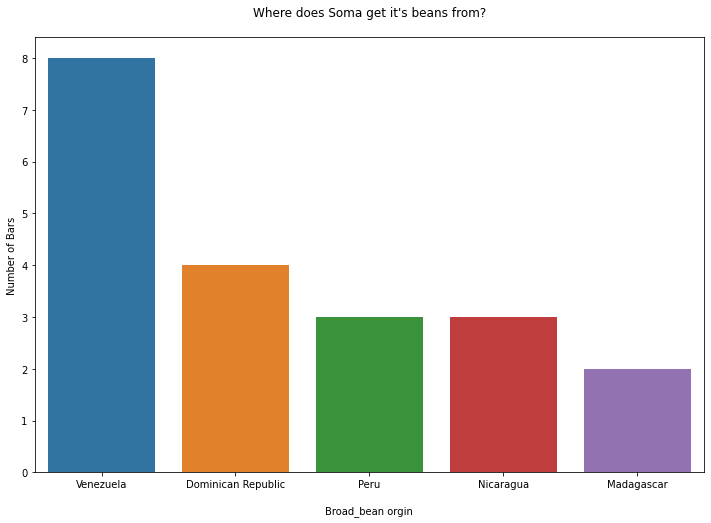

In [37]:
d6 = soma['BroadOrgin'].value_counts().sort_values(ascending=False).head(5)
d6 = pd.DataFrame(d6)
d6 = d6.reset_index() 


plt.figure(figsize=(12,8))
sns.barplot(x='index', y='BroadOrgin', data=d6)              #where does soma get its beans
plt.xlabel("\nBroad_bean orgin")
plt.ylabel("Number of Bars")
plt.title("Where does Soma get it's beans from?\n")
plt.show()

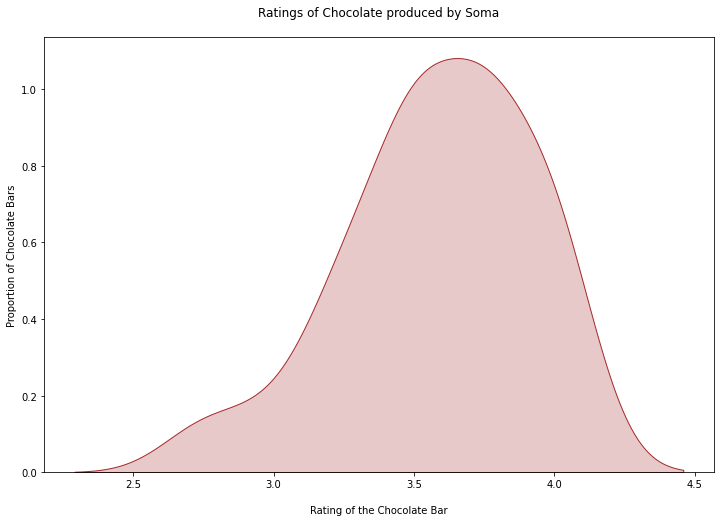

In [38]:
plt.figure(figsize=(12,8))
sns.kdeplot(soma['Rating'], legend=False, color="brown", shade=True)
plt.xlabel("\nRating of the Chocolate Bar")
plt.ylabel("Proportion of Chocolate Bars")           # ratings of the soma's chocolate bars
plt.title("Ratings of Chocolate produced by Soma\n")
plt.show()

In [39]:
d = df[df['Rating'] == 5.0]
d.count()

CompanyName     2
BeanOrigin      2
ReviewDate      2
CocoaPercent    2
Location        2
Rating          2
BeanType        0
BroadOrgin      2
dtype: int64

# conclusions
This analysis will helps the chocolate industries to find out  how the consumers rated the chocalate bar,what are the  most acceptable cocoa percentage, also this data help us to determine where the highest no. of consumers are located etc. This findings also helpful to the  customers to explore some good quality chocoates next time .

# insights 
This analysis change my understanding about the chocolate Bars .which gives  some insights that helpful to explore some good quality chocolates  next time.the percentage of cocoa ,where its beans comes from ,quality of beans etc are also the reason for its ratings .from this i found that the mean amount of cocoa used in most of the bars are 70%.most of the bars rated 3 to 4,which contain 70% ococoa.venezulea's beans are highly demanding one. chocolate bars containing  100% of coca is not much preferd.The sweet spot is around 70% of cocoa in it. Bars produced from USA get a rating >= 3.5.Next time buy some chocolates keep this in mind,it will helpsto explore some good qualiy chocolates